<a href="https://colab.research.google.com/github/arpitttiwari/arpitttiwari/blob/main/DLFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 

from keras.layers import Dense, Dropout, Input, ReLU
from keras.models import Model, Sequential
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
import glob

from PIL import Image
import matplotlib.pyplot as plt
import os
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,Dense,Flatten,Conv2DTranspose,BatchNormalization,LeakyReLU,Reshape
import tensorflow as tf

import os
# for dirname, _, filenames in os.walk('/content/images'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
path_arts = [] # Create a list of file paths for all .jpg files in the /content/images directory
train_path_arts = "/content/images"  # Set the path to the /content/images directory

for path in os.listdir(train_path_arts):          # Get a list of all the items in the directory

    if '.jpg' in path:
        path_arts.append(os.path.join(train_path_arts, path))

In [3]:
new_path_abstract=path_arts

In [4]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [7]:
images = [np.array((Image.open(path)).resize((128,128))) for path in new_path_abstract] 

for i in range(len(images)):
    images[i] = ((images[i] - images[i].min())/(255 - images[i].min()))
    #images[i] = images[i]*2-1  #uncomment this if activation is tanh for generator last layer
    
images_input = np.array(images) 

In [8]:
train_data=images_input

In [9]:
len(train_data)


2164

<Figure size 720x720 with 0 Axes>

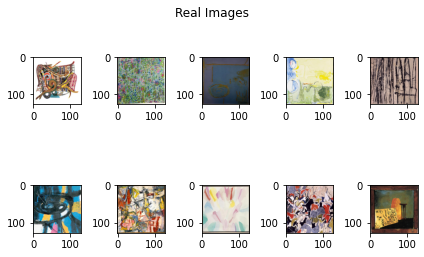

In [10]:
plt.figure(figsize=(10,10))
fig,ax=plt.subplots(2,5)
fig.suptitle("Real Images")
idx=0

for i in range(2):
    for j in range(5):            # Plot the image and reshape it to its original size (128,128,3)
            ax[i,j].imshow(train_data[idx].reshape(128,128,3))
            #ax[i,j].set_title("Real Image")
            
            idx+=200      # Increment the counter by 200 for each iteration
            
plt.tight_layout()
plt.show()

In [11]:
X_train = train_data  # Assign the value of train_data to the variable X_train


In [12]:
noise_shape = 100     # Set the value of noise_shape to 100


In [13]:
filters = [2048, 1024, 512, 256, 3] # Define a list of filters with the number of filters for each layer

generator=Sequential()

generator.add(Dense(4*4*512,input_shape=[noise_shape])) 
generator.add(Reshape([4,4,512])) # Add a reshape layer to reshape the output of the previous layer to [4,4,512]

for f in filters[:-1]:
    generator.add(Conv2DTranspose(f, kernel_size=4, strides=2, padding="same")) # Add a convolutional transpose layer with the number of filters specified in the loop
    generator.add(LeakyReLU(alpha=0.2))       # Add a leaky ReLU activation function
    generator.add(BatchNormalization())           # Add a batch normalization layer
    
generator.add(Conv2DTranspose(3, kernel_size=4, strides=2, padding="same",
                                 activation='sigmoid')) # Add a final convolutional transpose layer with 3 filters and a sigmoid activation function

In [14]:
generator.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8192)              827392    
                                                                 
 reshape (Reshape)           (None, 4, 4, 512)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 8, 8, 2048)       16779264  
 nspose)                                                         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 8, 8, 2048)        0         
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 2048)       8192      
 ormalization)                                                   
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 16, 16, 1024)     3

Discriminator


In [15]:
discriminator=Sequential()
discriminator.add(Conv2D(32, kernel_size=4, strides=2, padding="same",input_shape=[128,128, 3])) # Add a convolutional layer with 32 filters, a kernel size of 4, and strides of 2
discriminator.add(Conv2D(64, kernel_size=4, strides=2, padding="same")) # Add a convolutional layer with 64 filters, a kernel size of 4, and strides of 2
discriminator.add(LeakyReLU(0.2))
discriminator.add(BatchNormalization())
discriminator.add(Conv2D(128, kernel_size=4, strides=2, padding="same"))
discriminator.add(LeakyReLU(0.2)) # Add a leaky ReLU activation function with alpha 0.2
discriminator.add(BatchNormalization())
discriminator.add(Conv2D(256, kernel_size=4, strides=2, padding="same")) 
discriminator.add(LeakyReLU(0.2))
discriminator.add(Flatten())
discriminator.add(Dropout(0.5))
discriminator.add(Dense(1,activation='sigmoid'))

In [16]:
discriminator.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        1568      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        32832     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       131200    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                      

In [17]:
GAN =Sequential([generator,discriminator])


In [18]:
discriminator.compile(optimizer='RMSprop',loss='binary_crossentropy') # Compile the discriminator model using the RMSprop optimizer and binary cross entropy loss
discriminator.trainable = False

In [19]:
GAN.compile(optimizer='RMSprop',loss='binary_crossentropy') # Compile the GAN model using the RMSprop optimizer and binary cross entropy loss


In [20]:
GAN.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       61676291  
                                                                 
 sequential_1 (Sequential)   (None, 1)                 707297    
                                                                 
Total params: 62,383,588
Trainable params: 61,668,611
Non-trainable params: 714,977
_________________________________________________________________


In [21]:
D_loss=[] 
G_loss=[]

1/1 [==============================] - 7s 7s/step
epochs:  0
Time since start: 0.0
4/4 [==============================] - 65s 15s/step


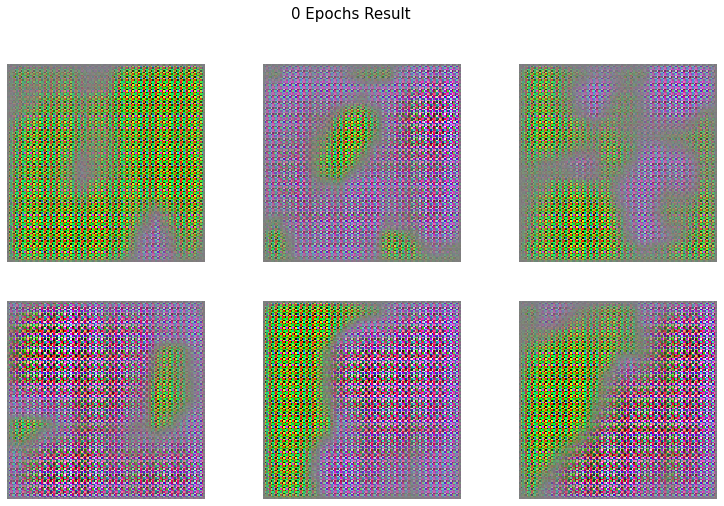

1/1 [==============================] - 5s 5s/step
epochs:  9
Time since start: 2348.0
Training Complete.


In [23]:
import time

epochs = 10
batch_size = 10 #64
current_time = time.time()

with tf.device('/gpu:0'):   # Train the GAN model using GPU acceleration
 for e in range(epochs):
    start_time = time.time()
    for _ in range(batch_size):
        # I reccomend you to look "Training Diagram" (at the top) 
        noise = np.random.normal(0,1, [batch_size,100])
        
        generated_images = generator.predict(noise)
       
        image_batch = X_train[np.random.randint(low = 0, high = X_train.shape[0], size = batch_size)] #get samples from real data
        
        x = np.concatenate([image_batch, generated_images])             # Concatenate the real and generated images

        
        y_dis = np.zeros(batch_size*2) 
        y_dis[:batch_size] = 1 # we labeled real images as 1 and generated images as 0
        
        discriminator.trainable = True
        d_loss = discriminator.train_on_batch(x,y_dis) # we are training discriminator (train_on_batch)
        
        noise = np.random.normal(0,1,[batch_size,100])
        
        y_gen = np.ones(batch_size) # our generator says "these images are real"
        
        discriminator.trainable = False
        
        g_loss = GAN.train_on_batch(noise, y_gen) #train_on_batch
        
        D_loss.append(d_loss)
        G_loss.append(g_loss)
        
    if (e%20 == 0) or (e == epochs-1) :
        print("epochs: ",e)
    if e == epochs-1:
        print("Time since start: {}".format(np.round(start_time - current_time)))
        print("Training Complete.")
    
    # printing results
    if e%100 == 0:
        print("Time since start: {}".format(np.round(start_time - current_time)))
        
        noise = np.random.normal(loc = 0, scale = 1, size=[100,100])
        generated_images = generator.predict(noise)
        generated_images = generated_images #.reshape(128,128, 3)

        fig, axs = plt.subplots(2, 3, figsize=(13, 8), sharey=True)
        axs[0,0].imshow(generated_images[66].reshape(128,128,3), interpolation = "nearest")
        axs[0,0].axis("off")

        noise = np.random.normal(loc = 0, scale = 1, size=[100,100])
        generated_images = generator.predict(noise)
        generated_images = generated_images #.reshape(128,128, 3)
        axs[0,1].imshow(generated_images[66].reshape(128,128,3), interpolation = "nearest")
        axs[0,1].axis("off")
        
        noise = np.random.normal(loc = 0, scale = 1, size=[100,100])
        generated_images = generator.predict(noise)
        generated_images = generated_images #.reshape(128,128, 3)
        axs[0,2].imshow(generated_images[66].reshape(128,128,3), interpolation = "nearest")
        axs[0,2].axis("off")

        noise = np.random.normal(loc = 0, scale = 1, size=[100,100])
        generated_images = generator.predict(noise)
        generated_images = generated_images #.reshape(128, 128,3)
        axs[1,0].imshow(generated_images[66].reshape(128,128,3), interpolation = "nearest")
        axs[1,0].axis("off")

        noise = np.random.normal(loc = 0, scale = 1, size=[100,100])
        generated_images = generator.predict(noise)
        generated_images = generated_images #.reshape(128,128,3)
        axs[1,1].imshow(generated_images[66].reshape(128,128,3), interpolation = "nearest")
        axs[1,1].axis("off")
        
        noise = np.random.normal(loc = 0, scale = 1, size=[100,100])
        generated_images = generator.predict(noise)
        generated_images = generated_images #.reshape(128,128,3)
        axs[1,2].imshow(generated_images[66].reshape(128,128,3), interpolation = "nearest")
        axs[1,2].axis("off")
        
        fig.suptitle("{} Epochs Result".format(str(e)),fontsize=15)
        plt.show()   

In [24]:
from keras import models
generator.save("generator_abstract_art.h5") # you can donwload this model from output part of this kernel.
discriminator.save("discriminator_abstract_art.h5") # you can donwload this model from output part of this kernel.

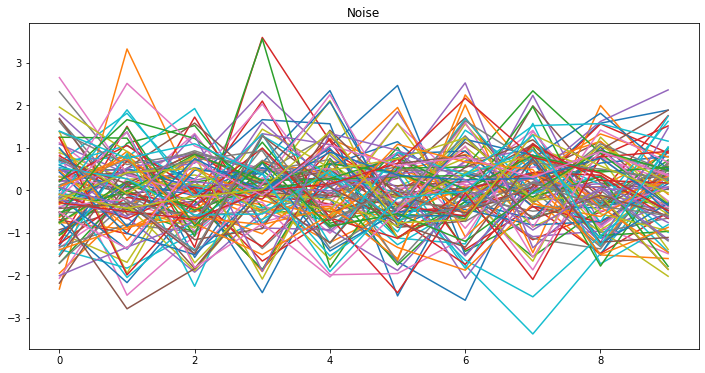

In [25]:
fig = plt.figure(figsize = (12,6))
plt.plot(noise)
plt.title("Noise")
plt.show()

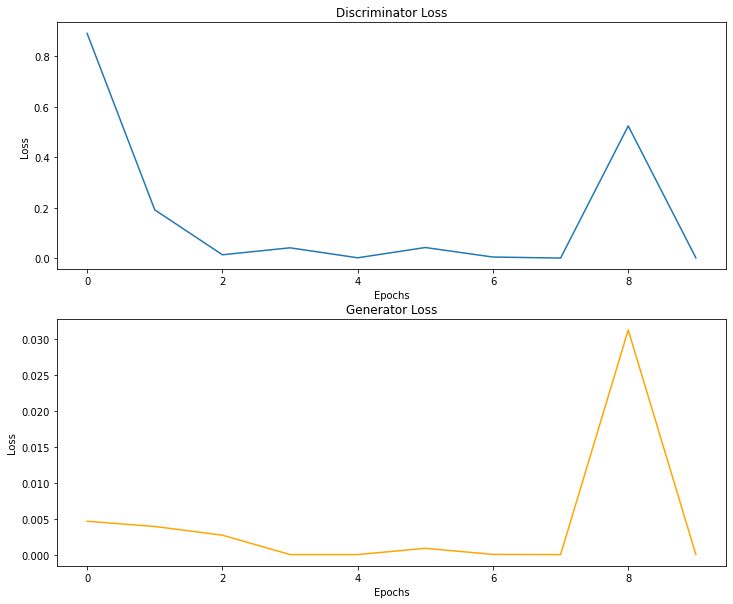

In [26]:
index = 0
D_loss2 = []
G_loss2 = []

for i in range(1,epochs+1):
    D_loss2.append(D_loss[index])
    G_loss2.append(G_loss[index])
    index += batch_size

fig, axs = plt.subplots(2, 1, figsize = (12,10))

axs[0].plot(D_loss2, label = "Discriminator Loss")
axs[1].plot(G_loss2, label = "Generator Loss", color = "orange")

axs[0].set_xlabel("Epochs")
axs[1].set_xlabel("Epochs")

axs[0].set_ylabel("Loss")
axs[1].set_ylabel("Loss")

axs[0].set_title("Discriminator Loss")
axs[1].set_title("Generator Loss")
plt.show()

4/4 [==============================] - 54s 12s/step


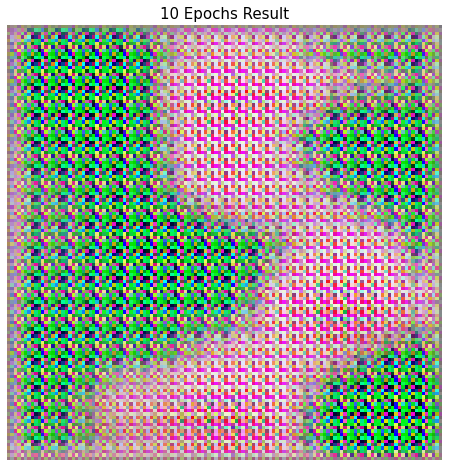

In [27]:
fig = plt.figure(figsize = (12,8))
noise = np.random.normal(loc = 0, scale = 1, size=[100,100])
generated_images = generator.predict(noise)
generated_images = generated_images 
plt.imshow(generated_images[66].reshape(128,128,3))
plt.axis("off")
plt.title("{} Epochs Result".format(str(e+1)),fontsize=15)
plt.show()

In [28]:
generated_images.shape


(100, 128, 128, 3)

In [30]:
#Inception Score (IS)


# import tensorflow as tf

# # Load the inception model and generate the activations for the generated images
# generated_images = tf.compat.v1.placeholder(tf.float32, shape=(None, 299, 299, 3))
# generated_images_reshaped = tf.reshape(generated_images, shape=((-1, 299*299*3)))

# model = tf.keras.applications.InceptionV3()
# generated_images1 = generated_images_reshaped # a batch of generated images (size: N x H x W x C)
# activations = model.predict(generated_images1)

# # Calculate the mean and standard deviation of the activations
# mean, std = activations.mean(), activations.std()

# # Calculate the Inception Score (IS)
# IS = (mean * std).mean()
# print (IS)




import tensorflow as tf

# Load the inception model and generate the activations for the generated images
# Define the input tensor with shape (batch_size, height, width, channels)
batch_size = 10  # change this to the actual batch size of your generated images
generated_images = tf.random.uniform((batch_size, 299, 299, 3))  # replace with actual generated images

# Reshape the input tensor to (batch_size, height * width * channels)
#generated_images_reshaped = tf.reshape(generated_images, shape=(-1, 299*299*3))

model = tf.keras.applications.InceptionV3()
#generated_images1 = generated_images_reshaped  # a batch of generated images (size: N x H x W x C)
activations = model.predict(generated_images)

# Calculate the mean and standard deviation of the activations
mean, std = activations.mean(), activations.std()

# Calculate the Inception Score (IS)
IS = (mean * std).mean()
print (IS)

4/4 [==============================] - 28s 7s/step
6.8200493e-06


In [32]:
import tensorflow as tf
from scipy.linalg import sqrtm

# Load the inception model and generate the activations for the generated and real images
model = tf.keras.applications.InceptionV3()
batch_size = 128  # change this to the actual batch size of your generated images
generated_images = tf.random.uniform((batch_size, 299, 299, 3))
real_images = images_input # a batch of real images (size: N x H x W x C)
generated_activations = model.predict(generated_images)
real_activations = model.predict(real_images)

# Calculate the mean and covariance of the activations
mean_generated = generated_activations.mean(axis=0)
cov_generated = np.cov(generated_activations, rowvar=False)
mean_real = real_activations.mean(axis=0)
cov_real = np.cov(real_activations, rowvar=False)

# Calculate the Fréchet Inception Distance (FID)
FID = np.linalg.norm(mean_generated - mean_real)**2 + np.trace(cov_generated + cov_real - 2*sqrtm(cov_generated * cov_real))
print (FID)

68/68 [==============================] - 63s 902ms/step
0.7483516782859192
